<a href="https://colab.research.google.com/github/dave0629g/simpleMLP/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
((x_train, y_train), (x_test,y_test)) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,223,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,161,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,91,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


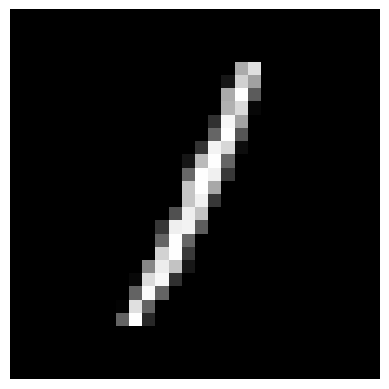

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd

c = random.randint(0, x_train.shape[0]-1)
plt.axis('off')
plt.imshow(x_train[c],cmap='gray')
pd.DataFrame(x_train[c])

In [5]:
# 資料預處理
# 1. Normalize (suitable for keras's default weights)
#   1.1 0-1 sigmoid
#   1.2 -1 - 1
#   Flatten for MLP  
x_train_flatten_normal = x_train.reshape(60000,784) /255
x_test_flatten_normal = x_test.reshape(10000,784) /255
# x_train_flatten_normal[0]

In [6]:
# 2. 答案預處理(One-Hot encoding)
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(128,activation='relu',input_dim=784))
mlp.add(Dense(10,activation='softmax'))
mlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 確定模型的訓練方式
# 隨機梯度下降
# loss: 最後輸出一個 binary_crossentropy, 最後輸出多個: categorical_crossentropy
# optimizer: 下陳的時候優化 => 基於動量
mlp.compile(loss='categorical_crossentropy',      metrics=["accuracy"],      optimizer='adam')

In [26]:
mlp.fit(x_train_flatten_normal,
    y_train_cat,
    batch_size=200,
    epochs=15,
    validation_split=0.1,
    verbose=1)

Epoch 1/15
270/270 [==============================] - 2s 6ms/step - loss: 0.4413 - accuracy: 0.8811 - val_loss: 0.1993 - val_accuracy: 0.9468
Epoch 2/15
270/270 [==============================] - 2s 7ms/step - loss: 0.2072 - accuracy: 0.9411 - val_loss: 0.1456 - val_accuracy: 0.9612
Epoch 3/15
270/270 [==============================] - 2s 9ms/step - loss: 0.1518 - accuracy: 0.9571 - val_loss: 0.1161 - val_accuracy: 0.9685
Epoch 4/15
270/270 [==============================] - 2s 6ms/step - loss: 0.1193 - accuracy: 0.9662 - val_loss: 0.1042 - val_accuracy: 0.9692
Epoch 5/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0981 - accuracy: 0.9721 - val_loss: 0.0963 - val_accuracy: 0.9715
Epoch 6/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0821 - accuracy: 0.9769 - val_loss: 0.0887 - val_accuracy: 0.9740
Epoch 7/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0703 - accuracy: 0.9799 - val_loss: 0.0830 - val_accuracy: 0.9755
Epoch 

In [30]:
mlp.evaluate(x_test_flatten_normal, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9796


[0.07020752876996994, 0.9796000123023987]

In [35]:
import numpy as np
pre=mlp.predict(x_test_flatten_normal) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [36]:
classes_x

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classes_x)


array([[ 970,    0,    1,    2,    1,    1,    2,    1,    1,    1],
       [   0, 1123,    4,    0,    0,    1,    2,    1,    4,    0],
       [   3,    1, 1014,    2,    1,    0,    2,    4,    5,    0],
       [   0,    0,    5,  993,    0,    1,    1,    3,    2,    5],
       [   1,    0,    3,    1,  959,    0,    4,    3,    1,   10],
       [   3,    0,    0,   14,    1,  864,    7,    1,    0,    2],
       [   3,    2,    2,    1,    4,    3,  943,    0,    0,    0],
       [   1,    2,    9,    1,    1,    0,    0, 1007,    1,    6],
       [   4,    0,    6,    9,    5,    4,    2,    3,  938,    3],
       [   1,    2,    0,    5,    7,    2,    0,    6,    1,  985]])

In [43]:
a=confusion_matrix(y_test, classes_x)


(10, 10)

In [39]:
pd.DataFrame(confusion_matrix(y_test, classes_x))

,0,1,2,3,4,5,6,7,8,9
0,970,0,1,2,1,1,2,1,1,1
1,0,1123,4,0,0,1,2,1,4,0
2,3,1,1014,2,1,0,2,4,5,0
3,0,0,5,993,0,1,1,3,2,5
4,1,0,3,1,959,0,4,3,1,10
5,3,0,0,14,1,864,7,1,0,2
6,3,2,2,1,4,3,943,0,0,0
7,1,2,9,1,1,0,0,1007,1,6
8,4,0,6,9,5,4,2,3,938,3
9,1,2,0,5,7,2,0,6,1,985
